In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Chennai.csv') 

In [3]:
print(data.head())
print(data.info())
print(data.isnull().sum())

      Price  Area        Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   5500000  1310   Perungalathur                3       0                 0   
1   5350000  1126      Madhavaram                2       0                 0   
2   8205000  1307      Karapakkam                3       0                 0   
3  23400000  3600  Thiruvidandhai                3       0                 0   
4  10100000  1700  Iyappanthangal                3       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  1             0  ...   
2          1             1                  1             1  ...   
3          1             1                  0             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              0    0                0   

In [4]:
data = data.dropna()

In [5]:
data = pd.get_dummies(data, drop_first=True)

In [6]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']               # Target


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor


In [10]:
model = RandomForestRegressor(n_estimators=200, random_state=42)  # 200 trees
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [11]:
predictions = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 95428620498007.53
R² Score: 0.32229961245691374


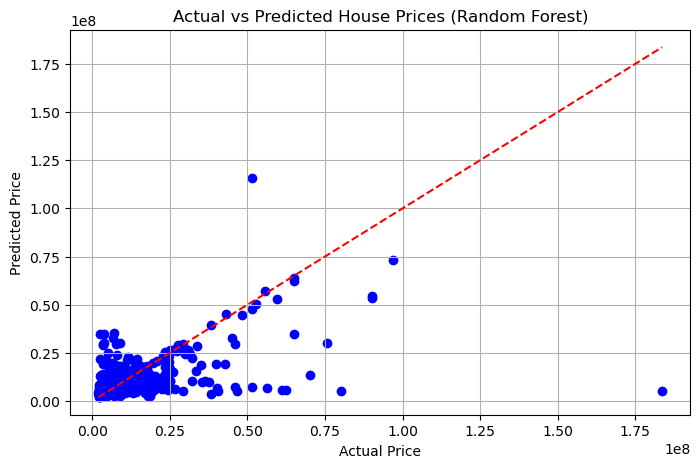

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.grid(True)
plt.show()